In [10]:
def get_epsln_candidate(F, G, domain, epsln_candidate):
    epsln_list = []
    
    for epsln in epsln_candidate:
        for x in domain:            
            cond = (F(x - epsln) -epsln <= G(x)) and  (G(x) <= F(x + epsln) + epsln)
            if not cond:
                break
                
        if cond:
            epsln_list.append(epsln)
    
    return epsln_list

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats

In [18]:
def Levy(F, G, domain, epsln_candidate):
    return min(get_epsln_candidate(F, G, domain, epsln_candidate))

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


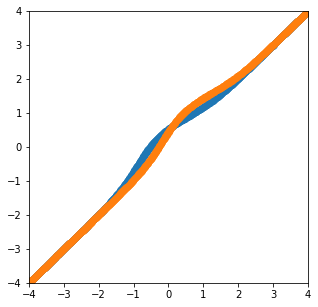

0.2712601837092352


In [107]:
from pylab import rcParams

rcParams['figure.figsize'] = 5,5

norm = scipy.stats.norm.pdf

start = -10
end = 10
bins = 1000
D = np.linspace(start, end, bins+1)

width = (end-start)/bins

mu_list = [0]
sigma_list = [1]
coef_list = np.array([1])
coef_list = coef_list / len(coef_list)

shifter = lambda f, alpha: lambda x: f(x - alpha)
gm = lambda x: sum([coef_list[i] * norm(x, mu_list[i], sigma_list[i]) for i in range(1)])

theta = np.sqrt(2)/2
R = np.array([[theta,-theta],[theta,theta]])
print(R)

shifts = np.array(range(2))
xys = np.zeros([2,2,bins+1])
for i,shift in enumerate(shifts):
    #plt.plot(D,(shifter(gm, shift))(D))
    xy = np.array([D,(shifter(gm, shift))(D)])
    xy = np.dot(R,xy)
    plt.scatter(xy[0],xy[1])
    xys[i] = xy
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()
m = 0
xj=0
yj=0
mx = 0
my = 0

for i in range(bins+1):
    x0 = xys[0,0,i]
    y0 = xys[0,1,i]
    while x0>xys[1,0,xj] and xj < bins:
        xj=xj+1
        mx = np.abs(y0-xys[1,1,int(xj)])
    while y0>xys[1,1,yj] and yj < bins:
        if yj < bins:
            yj=yj+1
        my = np.abs(x0-xys[1,0,int(yj)])
    m = np.max([m,np.min([mx,my])])
print(m)

In [62]:
m = 0
xj=0
yj=0
mx = 0
my = 0

for i in range(bins+1):
    x0 = xys[0,0,i]
    y0 = xys[0,1,i]
    while x0>xys[1,0,xj] and xj < bins:
        xj=xj+1
        mx = np.abs(y0-xys[1,1,int(xj)])
    while y0>xys[1,1,yj] and yj < bins:
        if yj < bins:
            yj=yj+1
        my = np.abs(x0-xys[1,0,int(yj)])
    m = np.max([m,np.min([mx,my])])
print(m)

0.27117342631938457


In [68]:
import time

lvs = []
#domain_step = abs(D[0] - D[1])
domain_step = 0.01
epsln_candidate = np.arange(0, 1, domain_step)
#print(epsln_candidate)
start = time.time()
for shift in shifts:   
    lvs.append(Levy(gm, shifter(gm, shift), D, epsln_candidate))
t = time.time() - start
print('time:'+str(t)+'[sec]')

plt.xlabel='Shift'
plt.plot(shifts, lvs, label='levy')
#plt.xlim([0,10])
plt.legend()

plt.show()

NameError: name 'Levy' is not defined

In [65]:
#関数Levyの代わりにこれを使うと手元タスク10倍早くなった
#max_v：Levy最大値
#traial：2^{-traial}がLevy距離の探索幅になる
def Levy_H(F, G, domain, max_v, trial):
    levy = 0
    epsln = max_v
    for x in domain:
        cond = (F(x - epsln) -epsln <= G(x)) and  (G(x) <= F(x + epsln) + epsln)
        if not cond:
            levy = max_v
            return levy
    add_eps = [np.power(0.5,i+1) for i in range(trial)]
    for i in range(int(trial)):
        #epsln = levy + max_v*np.power(0.5,i+1)
        epsln = levy + add_eps[i]
        for x in domain:            
            cond = (F(x - epsln) -epsln <= G(x)) and  (G(x) <= F(x + epsln) + epsln)
            if not cond:
                levy = epsln
                break
    return levy



In [95]:
def Levy_SH(F, G, domain):
    theta = np.sqrt(2)/2
    R = np.array([[theta,-theta],[theta,theta]])

    xys = np.zeros([2,2,bins+1])
    xyF = np.array([domain,[F(x) for x in domain ]])
    xys[0]=np.dot(R,xyF)
    xyG = np.array([domain,[G(x) for x in domain ]])
    xys[1]=np.dot(R,xyG)
    m = 0
    xj=0
    yj=0
    mx = 0
    my = 0

    for i in range(bins+1):
        x0 = xys[0,0,i]
        y0 = xys[0,1,i]
        while x0>xys[1,0,xj] and xj < bins:
            xj=xj+1
        mx = np.abs(y0-xys[1,1,int(xj)])
        while y0>xys[1,1,yj] and yj < bins:
            if yj < bins:
                yj=yj+1
        my = np.abs(x0-xys[1,0,int(yj)])
        m = np.max([m,np.min([mx,my])])
    return m

time:9.190230131149292[sec]


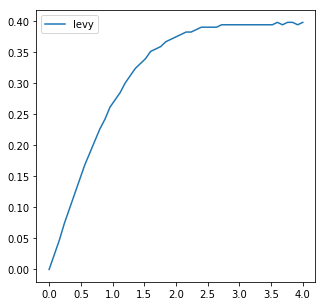

In [102]:
import time

lvs = []
#domain_step = abs(D[0] - D[1])
shifts = np.linspace(0,4,51)
domain_step = 0.01
epsln_candidate = np.arange(0, 1, domain_step)
#print(epsln_candidate)
start = time.time()
for shift in shifts:   
    lvs.append(Levy_H(gm, shifter(gm, shift), D, 1.0, 8))
    #lvs.append(Levy_SH(gm, shifter(gm, shift), D))
t = time.time() - start
print('time:'+str(t)+'[sec]')

plt.xlabel='Shift'
plt.plot(shifts, lvs, label='levy')
#plt.xlim([0,10])
plt.legend()

plt.show()

time:7.133593559265137[sec]


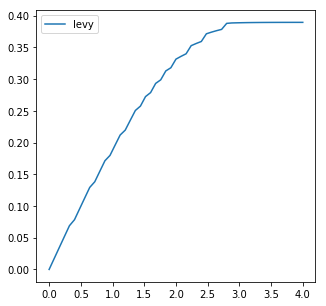

In [110]:
import time

start = -10
end = 10
bins = 1000
D = np.linspace(start, end, bins+1)

lvs = []
#domain_step = abs(D[0] - D[1])
shifts = np.linspace(0,4,51)

start = time.time()
for shift in shifts:   
    #lvs.append(Levy_H(gm, shifter(gm, shift), D, 1.0, 8))
    lvs.append(Levy_SH(gm, shifter(gm, shift), D)*np.sqrt(0.5))
t = time.time() - start
print('time:'+str(t)+'[sec]')

plt.xlabel='Shift'
plt.plot(shifts, lvs, label='levy')
#plt.xlim([0,10])
plt.legend()

plt.show()

In [81]:
print([x*x for x in range(10)])

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
